# Exploratory Data Analysis – Project Samarth

This notebook explores sample agricultural production and rainfall datasets.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt


## Load Raw Data


In [3]:
rainfall = pd.read_csv('../data/raw/rainfall_data.csv')
crops = pd.read_csv('../data/raw/crop_production.csv')

rainfall.head()


,State,District,Year,Month,Rainfall_mm
0,State_X,District_1,2022,1,75
1,State_X,District_1,2022,2,80
2,State_Y,District_3,2022,1,65
3,State_Y,District_4,2022,2,70
4,State_X,District_1,2023,1,78


In [4]:
crops.head()


,State,District,Crop,Year,Season,Area,Production,Yield
0,State_X,District_1,Wheat,2022,Rabi,1200,3600,3.0
1,State_X,District_2,Rice,2022,Kharif,1500,4500,3.0
2,State_Y,District_3,Wheat,2022,Rabi,1000,2800,2.8
3,State_Y,District_4,Rice,2022,Kharif,1300,3900,3.0
4,State_X,District_1,Wheat,2023,Rabi,1250,3750,3.0


## Aggregate Rainfall by State-Year


In [5]:
# Aggregate rainfall by State and Year
rainfall_agg = rainfall.groupby(['State', 'Year'])['Rainfall_mm'].sum().reset_index()

rainfall_agg


,State,Year,Rainfall_mm
0,State_X,2022,155
1,State_X,2023,160
2,State_Y,2022,135


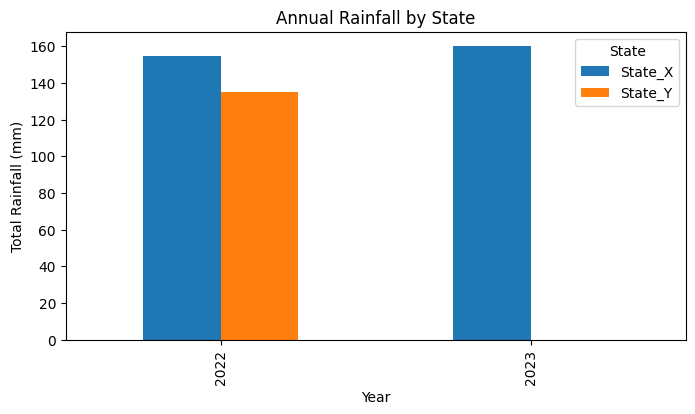

In [6]:
# Pivot for plotting
pivot_rainfall = rainfall_agg.pivot(index='Year', columns='State', values='Rainfall_mm')
pivot_rainfall.plot(kind='bar', figsize=(8, 4))
plt.ylabel('Total Rainfall (mm)')
plt.title('Annual Rainfall by State')
plt.show()


## Top Crop Production by State


In [7]:
top_crops = crops.groupby(['State', 'Crop'])['Production'].sum().reset_index()
top_crops = top_crops.sort_values(['State', 'Production'], ascending=[True, False])
top_crops.groupby('State').head(2)


,State,Crop,Production
1,State_X,Wheat,7350
0,State_X,Rice,4500
2,State_Y,Rice,3900
3,State_Y,Wheat,2800


## Analyze Crop Production Trend Over Years


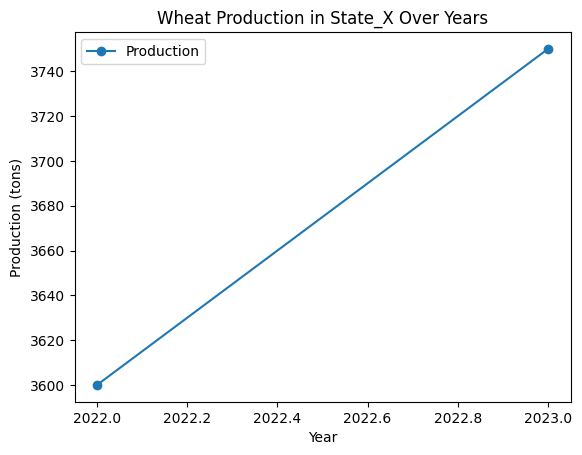

In [8]:
# Example: Trend for Wheat in State_X
df = crops[(crops['Crop'] == 'Wheat') & (crops['State'] == 'State_X')]
df.plot(x='Year', y='Production', kind='line', marker='o')
plt.title('Wheat Production in State_X Over Years')
plt.ylabel('Production (tons)')
plt.show()
